# Analyzing titanic Dataset

## Importing libs we'd need in our project

In [1]:
import datetime

import matplotlib as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Load titanic csv files and concat them into 1 big dasaset

In [2]:
train = pd.read_csv('/Users/oleggerasimovich/Downloads/train.csv')
test = pd.read_csv('/Users/oleggerasimovich/Downloads/test.csv')

titanic = pd.concat([train, test], ignore_index=True)

titanic.shape

(1309, 12)

In [3]:
titanic.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


# Describe numeric attributes

In [4]:
titanic[['Age', 'Fare']].describe()

,Age,Fare
count,1046.000000,1308.000000
mean,29.881138,33.295479
std,14.413493,51.758668
min,0.170000,0.000000
25%,21.000000,7.895800
50%,28.000000,14.454200
75%,39.000000,31.275000
max,80.000000,512.329200


# Clean Dataset

In [5]:
titanic.dropna(subset=['Age', 'Survived'], inplace=True)

titanic.drop(columns=['Ticket', 'Cabin'], inplace=True)

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
885,886,0.0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


# Replace Mr. Algernon Henry Wilson age

In [6]:
titanic[titanic['Name'].str.contains('Barkworth')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
630,631,1.0,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.0,S


In [7]:
birth_day = datetime.datetime(1864, 6, 4)

titanic_date = datetime.datetime(1912, 4, 15)

difference = titanic_date -  birth_day

real_age = difference.days // 360

titanic.loc[titanic['Name'] == 'Barkworth, Mr. Algernon Henry Wilson', 'Age'] = real_age 

titanic[titanic['Name'] == 'Barkworth, Mr. Algernon Henry Wilson']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
630,631,1.0,1,"Barkworth, Mr. Algernon Henry Wilson",male,48.0,0,0,30.0,S


# Create pie diagram displaying percentage of survived and not survived old people in different classes

In [8]:
age = titanic.loc[titanic['Age'] > 45]

old = age[['Pclass', 'Age', 'Survived']].rename(columns={'Pclass': 'Class'})

old.head()

,Class,Age,Survived
6,1,54.0,0.0
11,1,58.0,1.0
15,2,55.0,1.0
33,2,66.0,0.0
52,1,49.0,1.0


In [9]:
classified_age = old.groupby(['Class'])['Age'].count()

classified_survived = old.groupby(['Class'])['Survived'].sum()

classified = classified_age.to_frame().join(classified_survived.to_frame())

classified.rename(
    columns={
        'Age': 'old_cnt', 
        'Survived': 'old_survived_cnt',  
    }, 
    inplace=True)

classified.head()

,old_cnt,old_survived_cnt
Class,,
1,62,30.0
2,23,7.0
3,18,1.0


In [10]:
classified.reset_index(level=0, inplace=True)

classified['old_survived_percentage'] = (classified['old_survived_cnt'] / classified['old_cnt']) * 100

classified['died'] = classified['old_cnt'] - classified['old_survived_cnt']

classified.head()

,Class,old_cnt,old_survived_cnt,old_survived_percentage,died
0,1,62,30.0,48.387097,32.0
1,2,23,7.0,30.434783,16.0
2,3,18,1.0,5.555556,17.0


In [11]:
alive_or_not = pd.DataFrame(
    np.array([classified['old_survived_cnt'].tolist(), classified['died'].tolist()]),
    index=['Survived', 'Not Survived'],
    columns=[classified['Class']]
)

alive_or_not

Class,1,2,3
Survived,30.0,7.0,1.0
Not Survived,32.0,16.0,17.0


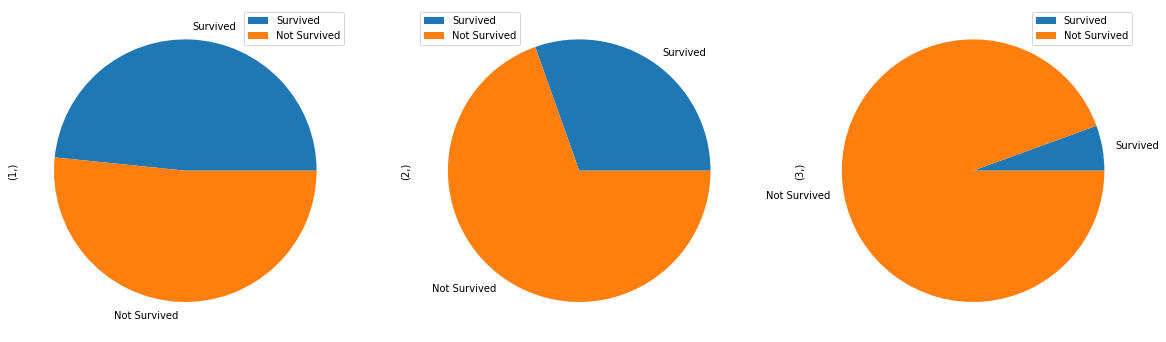

In [12]:
plots = alive_or_not.plot.pie(subplots=True, figsize=(20,10))


 # Sex proportions in different classes

In [13]:
sex_and_class = titanic[['Pclass', 'Sex']].rename(columns={'Pclass': 'class', 'Sex': 'sex'})

In [14]:
males = sex_and_class.where(sex_and_class['sex'] == 'male').groupby(['class'])['sex'].count()

females = sex_and_class.where(sex_and_class['sex'] == 'female').groupby(['class'])['sex'].count()


In [22]:
# alive_or_not = pd.DataFrame(
#     np.array([classified['old_survived_cnt'].tolist(), classified['died'].tolist()]),
#     index=['Survived', 'Not Survived'],
#     columns=[classified['Class']]
# )

males.name = 'males'

females.name = 'females'

gender_count = males.to_frame().join(females.to_frame())

gender_count.reset_index(level=0, inplace=True)
gender_count

,class,males,females
0,1.0,101,85
1,2.0,99,74
2,3.0,253,102


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf27bca160>,
      dtype=object)

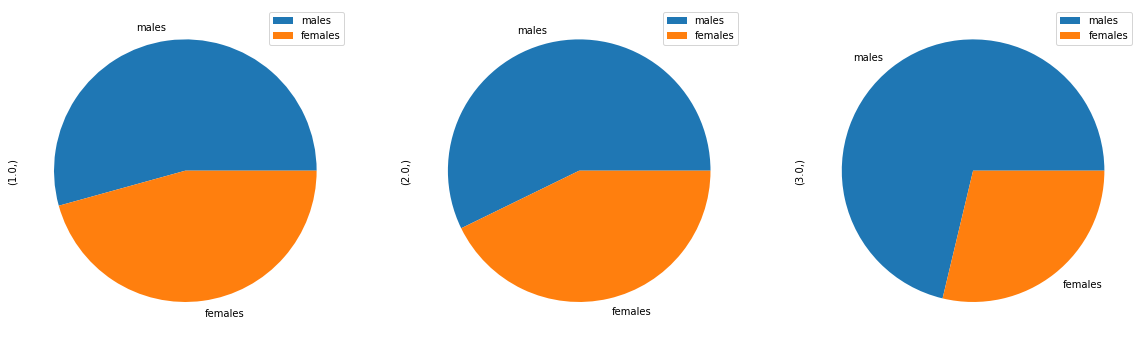

In [35]:
gender = pd.DataFrame(
    np.array([gender_count['males'].to_list(), gender_count['females'].to_list()]),
    index=['males', 'females'],
    columns=[gender_count['class']]
)

gender

gender.plot.pie(subplots=True, figsize=(20,10))

# Maximum age in each class

In [38]:
ca = titanic[['Pclass', 'Age']].rename(columns={'Pclass': 'class', 'Age': 'age'})

max_age = ca.groupby(['class'])['age'].max()

max_age

class
1    71.0
2    70.0
3    74.0
Name: age, dtype: float64

# Age proportions in different classes

In [41]:
class_and_age = titanic[['Pclass', 'Age']].rename(columns={'Pclass': 'class', 'Age': 'age'})

ages = class_and_age.groupby(['class'])['age'].mean()

frame = {'mean_age': ages}

age_proportions = pd.DataFrame(frame)

age_proportions

,mean_age
class,
1,38.061398
2,29.877630
3,25.140620


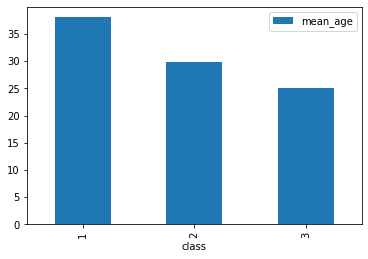

In [42]:
age_proportions.plot.bar()

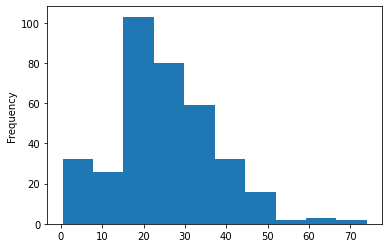

In [43]:
titanic.loc[titanic["Pclass"] == 3, "Age"].plot.hist()

# Correlations between sex, class, age, and survival

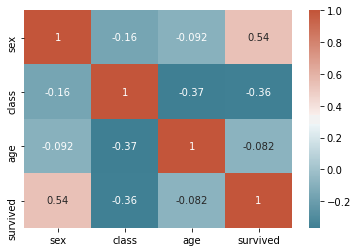

In [37]:
scac = titanic[['Sex', 'Pclass', 'Age', 'Survived']].rename(columns={
                                                             'Sex': 'sex', 
                                                             'Pclass': 'class', 
                                                             'Age': 'age',
                                                             'Survived': 'survived'
                                                            })

scac.replace({'male': 0, 'female': 1}, inplace=True)

corr = scac.corr()
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True)) 

# Correlations between sex and ticket price

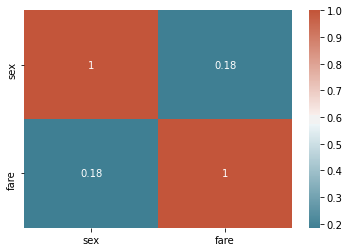

In [22]:
sf = pd.DataFrame({'sex': titanic['Sex'],
                   'fare': titanic['Fare']})

sf.replace({'male': 0, 'female': 1}, inplace=True)

corr = sf.corr()
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))